In [1]:
# data
import numpy as np
import matplotlib.pyplot as plt

def get_column(data, index):
    result = [row[index] for row in data]
    return result

data = np.genfromtxt('data.csv', delimiter=',').tolist()

x_data  = get_column(data, 0)
y_data = get_column(data, 1)
N = len(x_data)

print(f'areas: {x_data}')
print(f'prices: {y_data}')
print(f'data_size: {N}')

areas: [6.7, 4.6, 3.5, 5.5]
prices: [9.1, 5.9, 4.6, 6.7]
data_size: 4


In [2]:
# forward
def predict(x, w, b):
    return x*w + b

# compute gradient
def gradient(y_hat, y, x):
    dw = 2*x*(y_hat-y)
    db = 2*(y_hat-y)
    
    return (dw, db)

# update weights
def update_weight(w, b, lr, dw, db):
    w_new = w - lr*dw
    b_new = b - lr*db
    
    return (w_new, b_new)

In [9]:
# init weights
b = 0.04
w = -0.34
lr = 0.01

# parameters
epoch_max = 20
losses = [] # for debug

for epoch in range(epoch_max):
    
    # for an epoch    
    (dw_total, db_total) = (0, 0)
    loss_total = 0.0
    
    for i in range(N):        
        # get a sample
        x = x_data[i]
        y = y_data[i]    
        
        # predict y_hat
        y_hat = predict(x, w, b)

        # compute loss
        loss = (y_hat-y)*(y_hat-y)
        loss_total = loss_total + loss        

        # compute gradient
        (dw, db) = gradient(y_hat, y, x)
        
        # accumulate
        dw_total = dw_total + dw
        db_total = db_total + db

    # for debug
    losses.append(loss_total/N)
        
    # update weights
    (w, b) = update_weight(w, b, lr, dw_total/N, db_total/N)
        
print(w, b)

1.2391843374690399 0.3211949296371786


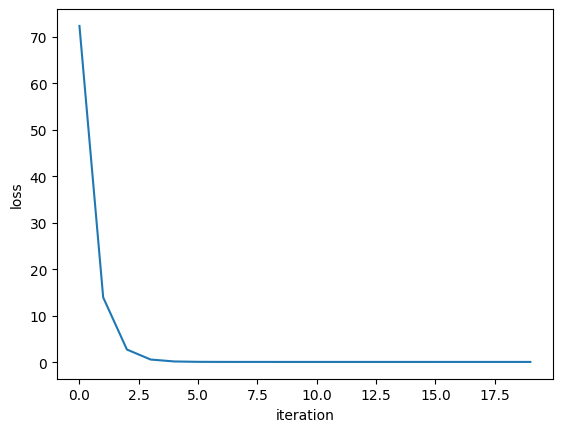

In [10]:
plt.plot(losses) 
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

Text(0.5, 1.0, 'Mean Squared Error (Batch)')

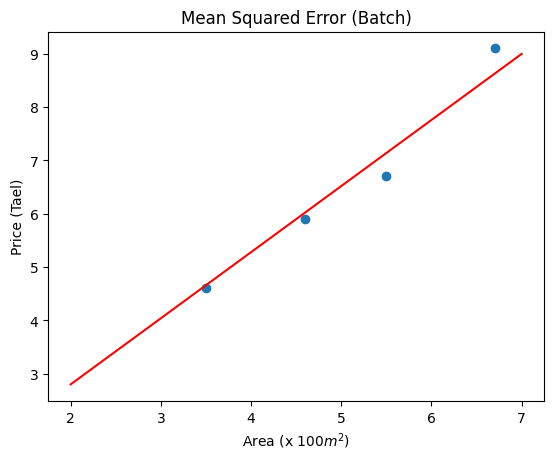

In [11]:
x_data = range(2, 8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')

data = np.genfromtxt('data.csv', delimiter=',').tolist()
areas  = get_column(data, 0)
prices = get_column(data, 1)
plt.scatter(areas, prices)
#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Squared Error (Batch)')